In [1]:
#Типы данных и инструменты,относящиеся к дате и времени

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
now=datetime.now()
now

datetime.datetime(2023, 5, 4, 9, 10, 19, 989104)

In [3]:
now.year,now.month,now.day

(2023, 5, 4)

In [4]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta

In [8]:
start=datetime(2011,1,7)
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
#Преобразование между строкой и datetime

In [11]:
stamp=datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs=['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [15]:
from dateutil.parser import parse

In [16]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('Jan 31,1997 10:45 PM')

datetime.datetime(2023, 1, 31, 22, 45)

In [18]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [19]:
datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [20]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [21]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True])

In [23]:
#Основы работы с временными рядами

In [24]:
from datetime import datetime
dates = [datetime(2011,1,2),datetime(2011,1,5),
        datetime(2011,1,7),datetime(2011,1,8),
        datetime(2011,1,10),datetime(2011,1,12)]
ts=pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.427419
2011-01-05    1.558277
2011-01-07    0.318236
2011-01-08   -0.882646
2011-01-10    2.437087
2011-01-12   -0.906023
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts+ts[::2]

2011-01-02   -0.854839
2011-01-05         NaN
2011-01-07    0.636472
2011-01-08         NaN
2011-01-10    4.874173
2011-01-12         NaN
dtype: float64

In [27]:
ts.index.dtype

dtype('<M8[ns]')

In [28]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [29]:
#Индексация, выбор, подмножество

In [30]:
stamp=ts.index[2]
ts[stamp]

0.3182360573041907

In [31]:
ts['1/10/2011']

2.437086536139542

In [32]:
ts['20110110']

2.437086536139542

In [33]:
longer_ts=pd.Series(np.random.randn(1000),
                    index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01   -0.777979
2000-01-02   -1.733154
2000-01-03    0.107240
2000-01-04    1.141191
2000-01-05   -0.843864
                ...   
2002-09-22    0.160129
2002-09-23    0.684378
2002-09-24    1.366279
2002-09-25   -1.865968
2002-09-26   -0.419142
Freq: D, Length: 1000, dtype: float64

In [34]:
longer_ts['2001']

2001-01-01   -1.406943
2001-01-02   -0.261909
2001-01-03   -0.852672
2001-01-04   -0.781964
2001-01-05    0.599090
                ...   
2001-12-27   -0.132516
2001-12-28    2.544549
2001-12-29   -0.829196
2001-12-30   -1.936501
2001-12-31    0.621723
Freq: D, Length: 365, dtype: float64

In [35]:
longer_ts['2001-05']

2001-05-01    0.973617
2001-05-02    2.930492
2001-05-03    1.386339
2001-05-04    0.586191
2001-05-05   -0.381666
2001-05-06   -0.573088
2001-05-07    0.507524
2001-05-08   -0.631074
2001-05-09   -0.577659
2001-05-10    0.215191
2001-05-11   -0.674056
2001-05-12   -1.220367
2001-05-13   -0.437511
2001-05-14   -0.325748
2001-05-15   -1.642766
2001-05-16    0.458484
2001-05-17    1.434944
2001-05-18   -0.131484
2001-05-19   -0.621272
2001-05-20    0.133185
2001-05-21   -0.037367
2001-05-22   -0.521981
2001-05-23    0.328427
2001-05-24    0.319663
2001-05-25    0.261075
2001-05-26    0.159924
2001-05-27    2.369025
2001-05-28   -0.923431
2001-05-29   -0.945838
2001-05-30    0.669808
2001-05-31   -2.079075
Freq: D, dtype: float64

In [36]:
ts[datetime(2011,1,7):]

2011-01-07    0.318236
2011-01-08   -0.882646
2011-01-10    2.437087
2011-01-12   -0.906023
dtype: float64

In [37]:
ts

2011-01-02   -0.427419
2011-01-05    1.558277
2011-01-07    0.318236
2011-01-08   -0.882646
2011-01-10    2.437087
2011-01-12   -0.906023
dtype: float64

In [38]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.318236
2011-01-08   -0.882646
2011-01-10    2.437087
dtype: float64

In [39]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.427419
2011-01-05    1.558277
2011-01-07    0.318236
2011-01-08   -0.882646
dtype: float64

In [40]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df=pd.DataFrame(np.random.randn(100,4),
                    index=dates,
                    columns=['Colorado','Texas','New York','Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.001444,0.605450,0.735306,-0.760165
2001-05-09,0.442363,-1.506254,0.153153,1.322669
2001-05-16,-1.129609,0.521675,-0.152574,-0.459059
2001-05-23,-0.292973,1.011848,1.125174,1.283576
2001-05-30,-0.712637,2.472135,0.519556,-0.970412


In [41]:
#Временные ряды с неуникальными индекасми

In [42]:
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000',
                        '1/2/2000','1/3/2000'])
dup_ts=pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [43]:
dup_ts.index.is_unique

False

In [44]:
dup_ts['1/3/2000']

4

In [45]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [46]:
grouped=dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [47]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [48]:
#Диапазоны дат, частоты и сдвиг

In [49]:
ts

2011-01-02   -0.427419
2011-01-05    1.558277
2011-01-07    0.318236
2011-01-08   -0.882646
2011-01-10    2.437087
2011-01-12   -0.906023
dtype: float64

In [50]:
resampler=ts.resample('D')

In [51]:
#Генерация диапазонов дат

In [52]:
index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [53]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [56]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [58]:
#Частоты и сдвиги дат

In [59]:
from pandas.tseries.offsets import Hour,Minute


In [60]:
hour=Hour()
hour

<Hour>

In [61]:
four_hours=Hour(4)
four_hours

<4 * Hours>

In [62]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [63]:
Hour(2)+Minute(30)

<150 * Minutes>

In [64]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [65]:
rng=pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [66]:
#Сдвиги дат (сдвиг вперед и назад)

In [67]:
ts=pd.Series(np.random.randn(4),
            index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31   -0.885654
2000-02-29    1.970882
2000-03-31    1.062527
2000-04-30   -0.508564
Freq: M, dtype: float64

In [68]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.885654
2000-04-30    1.970882
Freq: M, dtype: float64

In [69]:
ts.shift(-2)

2000-01-31    1.062527
2000-02-29   -0.508564
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [70]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -3.225340
2000-03-31   -0.460887
2000-04-30   -1.478636
Freq: M, dtype: float64

In [71]:
ts.shift(2,freq='M')

2000-03-31   -0.885654
2000-04-30    1.970882
2000-05-31    1.062527
2000-06-30   -0.508564
Freq: M, dtype: float64

In [72]:
ts.shift(3,freq='D')

2000-02-03   -0.885654
2000-03-03    1.970882
2000-04-03    1.062527
2000-05-03   -0.508564
dtype: float64

In [73]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00   -0.885654
2000-02-29 01:30:00    1.970882
2000-03-31 01:30:00    1.062527
2000-04-30 01:30:00   -0.508564
dtype: float64

In [74]:
#Сдвиг дат с помощью смещения

In [75]:
from pandas.tseries.offsets import Day,MonthEnd

In [76]:
now=datetime(2011,11,17)
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [77]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [78]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [79]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [80]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [81]:
ts=pd.Series(np.random.randn(20),
            index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15   -0.706057
2000-01-19    0.767309
2000-01-23    0.767088
2000-01-27   -1.191497
2000-01-31   -2.242802
2000-02-04    1.047432
2000-02-08   -0.022286
2000-02-12    0.283974
2000-02-16   -0.884090
2000-02-20    2.241991
2000-02-24    0.296343
2000-02-28   -1.697112
2000-03-03    0.336965
2000-03-07   -1.642994
2000-03-11   -0.009390
2000-03-15    0.033695
2000-03-19   -2.606734
2000-03-23   -1.532025
2000-03-27   -1.827110
2000-03-31    2.628393
Freq: 4D, dtype: float64

In [82]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.521192
2000-02-29    0.180893
2000-03-31   -0.577400
dtype: float64

In [83]:
ts.resample('M').mean()

2000-01-31   -0.521192
2000-02-29    0.180893
2000-03-31   -0.577400
Freq: M, dtype: float64

In [84]:
#Часовые пояса

In [85]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [86]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [87]:
#Локализация и преобразование

In [88]:
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='D')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -1.243043
2012-03-10 09:30:00    1.328888
2012-03-11 09:30:00    0.435141
2012-03-12 09:30:00    0.614269
2012-03-13 09:30:00    1.116010
2012-03-14 09:30:00   -0.468343
Freq: D, dtype: float64

In [89]:
print(ts.index.tz)

None


In [90]:
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [91]:
ts

2012-03-09 09:30:00   -1.243043
2012-03-10 09:30:00    1.328888
2012-03-11 09:30:00    0.435141
2012-03-12 09:30:00    0.614269
2012-03-13 09:30:00    1.116010
2012-03-14 09:30:00   -0.468343
Freq: D, dtype: float64

In [92]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.243043
2012-03-10 09:30:00+00:00    1.328888
2012-03-11 09:30:00+00:00    0.435141
2012-03-12 09:30:00+00:00    0.614269
2012-03-13 09:30:00+00:00    1.116010
2012-03-14 09:30:00+00:00   -0.468343
Freq: D, dtype: float64

In [93]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [94]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.243043
2012-03-10 04:30:00-05:00    1.328888
2012-03-11 05:30:00-04:00    0.435141
2012-03-12 05:30:00-04:00    0.614269
2012-03-13 05:30:00-04:00    1.116010
2012-03-14 05:30:00-04:00   -0.468343
Freq: D, dtype: float64

In [95]:
ts_eastern=ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.243043
2012-03-10 14:30:00+00:00    1.328888
2012-03-11 13:30:00+00:00    0.435141
2012-03-12 13:30:00+00:00    0.614269
2012-03-13 13:30:00+00:00    1.116010
2012-03-14 13:30:00+00:00   -0.468343
dtype: float64

In [96]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.243043
2012-03-10 15:30:00+01:00    1.328888
2012-03-11 14:30:00+01:00    0.435141
2012-03-12 14:30:00+01:00    0.614269
2012-03-13 14:30:00+01:00    1.116010
2012-03-14 14:30:00+01:00   -0.468343
dtype: float64

In [97]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [98]:
#Операции над объектами Timestamp с учетом часового пояса

In [99]:
stamp=pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [100]:
stamp_moscow=pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [101]:
stamp_utc.value

1299902400000000000

In [102]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [103]:
from pandas.tseries.offsets import Hour

In [104]:
stamp=pd.Timestamp('2012-03-12 01:30',tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [105]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [106]:
stamp=pd.Timestamp('2012-11-04 00:30',tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [107]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [108]:
#Операции между разными часовыми поясами

In [109]:
rng=pd.date_range('3/7/2012 9:30',periods=10,freq='B')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-07 09:30:00    0.344326
2012-03-08 09:30:00   -1.224537
2012-03-09 09:30:00   -0.108166
2012-03-12 09:30:00   -1.753894
2012-03-13 09:30:00    0.959912
2012-03-14 09:30:00    1.224035
2012-03-15 09:30:00    0.592793
2012-03-16 09:30:00    1.197551
2012-03-19 09:30:00   -0.783094
2012-03-20 09:30:00   -0.260604
Freq: B, dtype: float64

In [110]:
ts1=ts[:7].tz_localize('Europe/London')
ts2=ts1[2:].tz_convert('Europe/Moscow')
result=ts1+ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [111]:
#Периоды и арифметика периодов

In [112]:
p=pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [113]:
p+5

Period('2012', 'A-DEC')

In [114]:
p-2

Period('2005', 'A-DEC')

In [115]:
pd.Period('2014',freq='A-DEC')-p

<7 * YearEnds: month=12>

In [116]:
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [117]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -1.289791
2000-02    2.146468
2000-03    0.265689
2000-04    0.486084
2000-05    1.257468
2000-06    0.957454
Freq: M, dtype: float64

In [118]:
values=['2001Q3','2002Q2','2003Q1']
index=pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [119]:
#Преобразование частоты периода

In [120]:
p=pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [121]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [122]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [123]:
p=pd.Period('2007',freq='A-JUN')
p

Period('2007', 'A-JUN')

In [124]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [125]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [126]:
p=pd.Period('Aug-2007','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [127]:
rng = pd.period_range('2006','2009',freq='A-DEC')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006    0.213623
2007   -0.058000
2008    0.161132
2009   -0.696616
Freq: A-DEC, dtype: float64

In [128]:
ts.asfreq('M',how='start')

2006-01    0.213623
2007-01   -0.058000
2008-01    0.161132
2009-01   -0.696616
Freq: M, dtype: float64

In [129]:
ts.asfreq('B',how='end')

2006-12-29    0.213623
2007-12-31   -0.058000
2008-12-31    0.161132
2009-12-31   -0.696616
Freq: B, dtype: float64

In [130]:
#Квартальные частоты

In [131]:
p=pd.Period('2012Q4',freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [132]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [133]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [134]:
p4pm=(p.asfreq('B','e')-1).asfreq('T','s')+16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [135]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [136]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
ts=pd.Series(np.arange(len(rng)),index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [137]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60
ts.index=new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [138]:
#Преобразование временных меток в периоды и обратно

In [139]:
rng=pd.date_range('2000-01-01',periods=3,freq='M')
ts=pd.Series(np.random.randn(3),index=rng)
ts

2000-01-31    0.616334
2000-02-29   -0.670124
2000-03-31    1.327991
Freq: M, dtype: float64

In [140]:
pts=ts.to_period()
pts

2000-01    0.616334
2000-02   -0.670124
2000-03    1.327991
Freq: M, dtype: float64

In [141]:
rng=pd.date_range('1/29/2000',periods=6,freq='D')
ts2=pd.Series(np.random.randn(6),index=rng)
ts2

2000-01-29    0.143910
2000-01-30    0.045659
2000-01-31   -0.153143
2000-02-01    0.224042
2000-02-02    0.598170
2000-02-03   -0.025965
Freq: D, dtype: float64

In [142]:
ts2.to_period('M')

2000-01    0.143910
2000-01    0.045659
2000-01   -0.153143
2000-02    0.224042
2000-02    0.598170
2000-02   -0.025965
Freq: M, dtype: float64

In [143]:
pts=ts2.to_period()
pts

2000-01-29    0.143910
2000-01-30    0.045659
2000-01-31   -0.153143
2000-02-01    0.224042
2000-02-02    0.598170
2000-02-03   -0.025965
Freq: D, dtype: float64

In [144]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.143910
2000-01-30 23:59:59.999999999    0.045659
2000-01-31 23:59:59.999999999   -0.153143
2000-02-01 23:59:59.999999999    0.224042
2000-02-02 23:59:59.999999999    0.598170
2000-02-03 23:59:59.999999999   -0.025965
Freq: D, dtype: float64

In [145]:
#Создание PeriodIndex из массивов

In [146]:
data=pd.read_csv('macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [147]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [148]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [149]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [150]:
data.index=index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [151]:



#Передискретизация и преобразование частоты

In [152]:
rng=pd.date_range('2000-01-01',periods=100,freq='D')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01    1.042859
2000-01-02   -0.670018
2000-01-03   -0.422926
2000-01-04    2.443853
2000-01-05    0.573674
                ...   
2000-04-05   -0.226220
2000-04-06    0.073664
2000-04-07   -1.202955
2000-04-08   -0.976411
2000-04-09   -0.726485
Freq: D, Length: 100, dtype: float64

In [153]:
ts.resample('M').mean()

2000-01-31   -0.076695
2000-02-29    0.122392
2000-03-31   -0.173801
2000-04-30   -0.571664
Freq: M, dtype: float64

In [154]:
ts.resample('M',kind='period').mean()

2000-01   -0.076695
2000-02    0.122392
2000-03   -0.173801
2000-04   -0.571664
Freq: M, dtype: float64

In [155]:
rng=pd.date_range('2000-01-01',periods=12,freq='T')
ts=pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [156]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [157]:
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [158]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_96656/3012979123.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min',closed='right',label='right',loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [159]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [160]:
#Повышается передискретизация и интераоляция

In [161]:
frame=pd.DataFrame(np.random.randn(2,4),
                   index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                   columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.049483,-0.624155,0.223065,1.899496
2000-01-12,0.296185,0.161022,-0.687524,-0.866591


In [162]:
df_daily=frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.049483,-0.624155,0.223065,1.899496
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.296185,0.161022,-0.687524,-0.866591


In [163]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.049483,-0.624155,0.223065,1.899496
2000-01-06,1.049483,-0.624155,0.223065,1.899496
2000-01-07,1.049483,-0.624155,0.223065,1.899496
2000-01-08,1.049483,-0.624155,0.223065,1.899496
2000-01-09,1.049483,-0.624155,0.223065,1.899496
2000-01-10,1.049483,-0.624155,0.223065,1.899496
2000-01-11,1.049483,-0.624155,0.223065,1.899496
2000-01-12,0.296185,0.161022,-0.687524,-0.866591


In [164]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.049483,-0.624155,0.223065,1.899496
2000-01-06,1.049483,-0.624155,0.223065,1.899496
2000-01-07,1.049483,-0.624155,0.223065,1.899496
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.296185,0.161022,-0.687524,-0.866591


In [165]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.049483,-0.624155,0.223065,1.899496
2000-01-13,0.296185,0.161022,-0.687524,-0.866591


In [166]:
#Передискретизация с периодами

In [167]:
frame=pd.DataFrame(np.random.randn(24,4),
                   index=pd.period_range('1-2000','12-2001',freq='M'),
                   columns=['Colorado','Texas','New York','Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.753335,0.191760,0.787510,1.502036
2000-02,0.219824,1.764261,0.571449,1.409216
2000-03,0.595580,0.456350,-0.731147,0.445320
2000-04,-0.275545,1.485734,1.257674,0.825310
2000-05,1.797016,0.413356,-0.562978,0.615007


In [168]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.207417,0.771907,-0.117533,0.480302
2001,-0.038369,-0.135829,0.120968,-0.237917


In [169]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.207417,0.771907,-0.117533,0.480302
2000Q2,0.207417,0.771907,-0.117533,0.480302
2000Q3,0.207417,0.771907,-0.117533,0.480302
2000Q4,0.207417,0.771907,-0.117533,0.480302
2001Q1,-0.038369,-0.135829,0.120968,-0.237917
2001Q2,-0.038369,-0.135829,0.120968,-0.237917
2001Q3,-0.038369,-0.135829,0.120968,-0.237917
2001Q4,-0.038369,-0.135829,0.120968,-0.237917


In [170]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.207417,0.771907,-0.117533,0.480302
2001Q1,0.207417,0.771907,-0.117533,0.480302
2001Q2,0.207417,0.771907,-0.117533,0.480302
2001Q3,0.207417,0.771907,-0.117533,0.480302
2001Q4,-0.038369,-0.135829,0.120968,-0.237917


In [171]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.207417,0.771907,-0.117533,0.480302
2001Q1,0.207417,0.771907,-0.117533,0.480302
2001Q2,0.207417,0.771907,-0.117533,0.480302
2001Q3,0.207417,0.771907,-0.117533,0.480302
2001Q4,-0.038369,-0.135829,0.120968,-0.237917
2002Q1,-0.038369,-0.135829,0.120968,-0.237917
2002Q2,-0.038369,-0.135829,0.120968,-0.237917
2002Q3,-0.038369,-0.135829,0.120968,-0.237917


In [172]:
#Скользящие оконные функции

<AxesSubplot: >

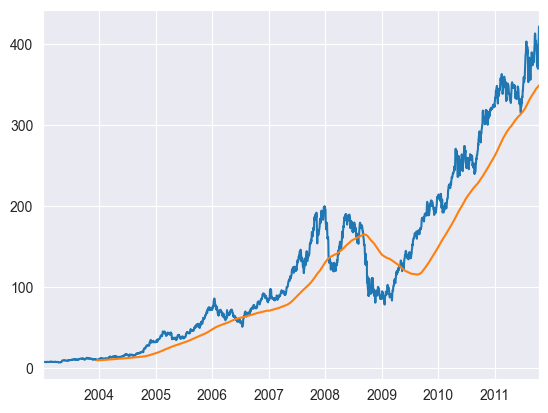

In [173]:
close_px_all=pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px=close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [174]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot: >

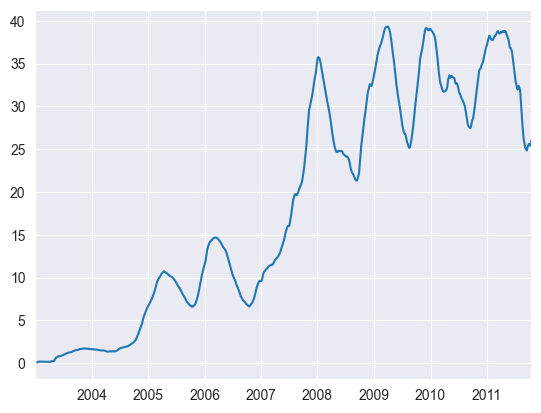

In [175]:
appl_std250.plot()

<AxesSubplot: >

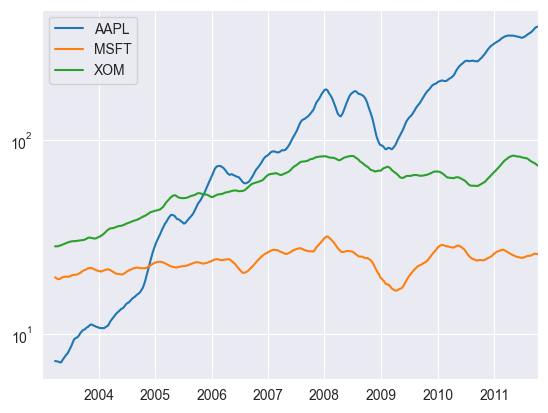

In [176]:
expanding_mean=appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [177]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [178]:
#Экспоненциально взвешенные функции

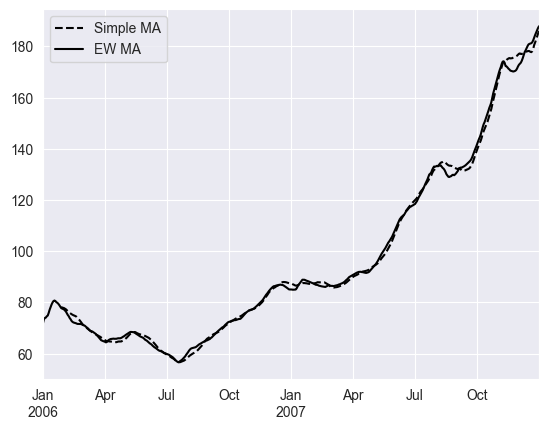

In [179]:
aapl_px=close_px.AAPL['2006':'2007']
ma60=aapl_px.rolling(30,min_periods=20).mean()
ewma60=aapl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k-',label='EW MA')
plt.legend()

In [180]:
#Бинарные скользящие окна

<AxesSubplot: >

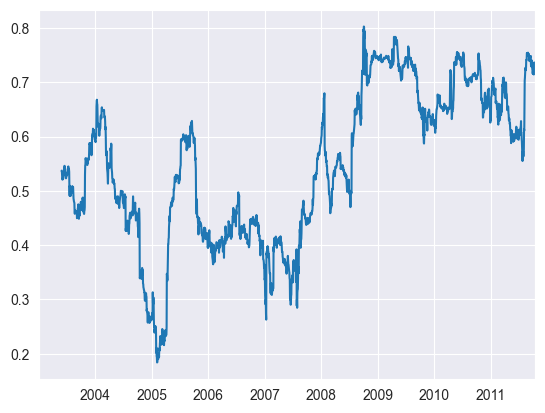

In [181]:
spx_px=close_px_all['SPX']
spx_rets=spx_px.pct_change()
returns=close_px.pct_change()
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot: >

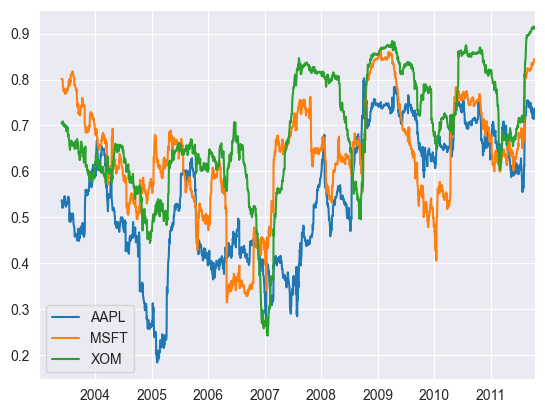

In [182]:
corr = returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

In [183]:
#Скользящие оконные функции, опреденные пользователям

<AxesSubplot: >

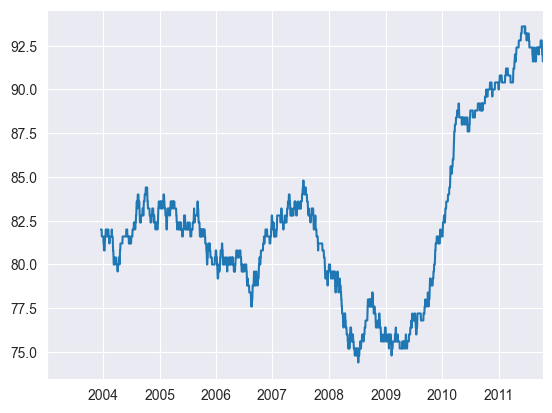

In [184]:
from scipy.stats import percentileofscore
score_at_2percent=lambda x:percentileofscore(x,0.02)
result=returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()